Records in Cricket - Men's Dataset Analsis (Web Scraping)

links: https://www.cricbuzz.com/cricket-stats/icc-rankings/men/batting

#steps

1.import all the libraries for Web scraping ,Data Visualization, Analysis
2.Scrape the data
3.Data Exploration ,Data Cleaning, Data Manipulation 
4.Convert it into the DataFrame 
5.Perform the analysis (EDA)

In [1]:
#Numpy
import numpy as np

#pandas 
import pandas as pd

#Matplotlib
import matplotlib.pyplot as plt

#Seaborn
import seaborn as sns

#BeautifulSoup
from bs4 import BeautifulSoup

#Regex
import re

#Requests
import requests

#### Data Exploration, Data cleaning , Data manipulation 

In [2]:
#performing the data scraping from the web 
url="https://m.cricbuzz.com/cricket-stats"
res=requests.get(url)

#checking the status code 
res

#if status code [200]> then going to scaping otherwise do nothing 
soup=BeautifulSoup(res.content)


#Data Cleaning
Player=[]
Matches=[]
Innings=[]
Runs=[]
Average=[]
Strike_Rate=[]
No_of_4s=[]
No_of_6s=[]

count=0
for i in soup.findAll("td"):
    i=re.sub('^<td.*">|<a.*">||</a>|</td>',"",str(i))
    if count==0:
        Player.append(i)
        count +=1
        
    elif count==1:
        Matches.append(i)
        count +=1
        
    elif count==2:
        Innings.append(i)
        count +=1
    
    elif count==3:
        Runs.append(i)
        count +=1
        
    elif count==4:
        Average.append(i)
        count +=1
    
    elif count==5:
        Strike_Rate.append(i)
        count +=1
        
    elif count==6:
        No_of_4s.append(i)
        count +=1
        
    else:
        No_of_6s.append(i)
        count=0
        

#create dataframe from web scraping test format
Crickets_records=pd.DataFrame({"Player":Player,"Matches":Matches,"Innings":Innings,"Runs":Runs,
                               "Average":Average,"Strike_Rate":Strike_Rate,"No_of_4s":No_of_4s,"No_of_6s":No_of_6s})


In [3]:
#find the <td> elements and append in array
arr=[]
for i in soup.findAll("td"):
    arr.append(str(i))


In [5]:
#showing 20 elements of array
arr[0:20]

['<td class="col-span-2 wb:col-span-3 p-2 text-cbTextLink bg-white font-bold"><a href="/profiles/25/sachin-tendulkar" title="Sachin Tendulkar">Sachin Tendulkar</a></td>',
 '<td class="w-full text-right bg-white p-2">200</td>',
 '<td class="w-full text-right bg-white p-2">329</td>',
 '<td class="w-full text-right bg-white p-2">15921</td>',
 '<td class="w-full text-right bg-white p-2">53.79</td>',
 '<td class="w-full text-right bg-white p-2 hidden tb:block">54.08</td>',
 '<td class="w-full text-right bg-white p-2 hidden tb:block">2058</td>',
 '<td class="w-full text-right bg-white p-2 hidden tb:block">69</td>',
 '<td class="col-span-2 wb:col-span-3 p-2 text-cbTextLink bg-white font-bold"><a href="/profiles/38/ricky-ponting" title="Ricky Ponting">Ricky Ponting</a></td>',
 '<td class="w-full text-right bg-white p-2">168</td>',
 '<td class="w-full text-right bg-white p-2">287</td>',
 '<td class="w-full text-right bg-white p-2">13378</td>',
 '<td class="w-full text-right bg-white p-2">51.85<

In [6]:
#First row of array
arr[0]

'<td class="col-span-2 wb:col-span-3 p-2 text-cbTextLink bg-white font-bold"><a href="/profiles/25/sachin-tendulkar" title="Sachin Tendulkar">Sachin Tendulkar</a></td>'

In [7]:
#testing to clean one element of array
re.sub('^<td.*">|<a.*">||</a>|</td>',"",arr[8])


'Ricky Ponting'

In [9]:
#columns=["player","matches","inns","runs","avg","sr","4s","6s"]

# Test career of Batsman

In [8]:
Crickets_records

,Player,Matches,Innings,Runs,Average,Strike_Rate,No_of_4s,No_of_6s
0,Sachin Tendulkar,200,329,15921,53.79,54.08,2058,69
1,Ricky Ponting,168,287,13378,51.85,58.72,1509,73
2,Jacques Kallis,166,280,13289,55.37,45.98,1488,97
3,Rahul Dravid,164,286,13288,52.31,42.51,1655,21
4,Joe Root,152,278,12972,50.87,57.48,1394,45
5,Cook,161,291,12472,45.35,46.95,1441,11
6,Kumar Sangakkara,134,233,12400,57.14,54.19,1491,51
7,Brian Lara,131,232,11953,52.89,60.51,1559,88
8,Chanderpaul,164,280,11867,51.37,43.32,1285,36
9,Jayawardene,149,252,11814,49.85,51.46,1387,61


## this Records in all Format(Test,ODI,T20) -> Second dataset

In [9]:
#performing the data scraping from the web 
url="https://www.espncricinfo.com/records/most-runs-in-career-284269"
res=requests.get(url)


#checking the status code 
res

#if status code [200]> then going to scaping otherwise do nothing 
soup=BeautifulSoup(res.content)


In [12]:
# showing some line of content from Scraping
soup


<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><link crossorigin="anonymous" href="https://img1.hscicdn.com" rel="preconnect"/><link crossorigin="anonymous" href="https://dcf.espn.com" rel="preconnect"/><link as="font" crossorigin="anonymous" href="https://wassets.hscicdn.com/static/fonts/CiIcons/ci-icons-v3.5/fonts/icomoon.woff?gencn3" rel="preload" type="font/woff2"/><script type="text/javascript">
          /*! js-cookie v3.0.5 | MIT */
          !function(e,t){"object"==typeof exports&&"undefined"!=typeof module?module.exports=t():"function"==typeof define&&define.amd?define(t):(e="undefined"!=typeof globalThis?globalThis:e||self,function(){var n=e.Cookies,o=e.Cookies=t();o.noConflict=function(){return e.Cookies=n,o}}())}(this,(function(){"use strict";function e(e){for(var t=1;t<arguments.length;t++){var n=arguments[t];for(var o in n)e[o]=n[o]}return e}var t=function t(n,o){function r(t,r,i){if("undefined"!=typeof document){"number"==typeof(i=e({},o,i)).expires&&(i.ex

In [13]:
#find the <span> elements and append in array
arr=[]
for i in soup.findAll("span"):
    arr.append(str(i))

In [15]:
# showing some line of content from array
arr[0:39]

['<span class="ds-text-title-xs ds-font-bold ds-text-typo">Records</span>',
 '<span class="ds-text-tight-m ds-font-regular">Home</span>',
 '<span></span>',
 '<span class="ds-text-tight-m ds-font-regular">2024</span>',
 '<span></span>',
 '<span class="ds-text-tight-m ds-font-regular">Ask Cricinfo</span>',
 '<span></span>',
 '<span class="ds-text-tight-m ds-font-regular"><span class="ds-flex ds-items-center">Statsguru<i class="icon-launch-outlined ds-text-icon hover:ds-text-typo-primary-hover ds-ml-2" style="font-size:16px"></i></span></span>',
 '<span class="ds-flex ds-items-center">Statsguru<i class="icon-launch-outlined ds-text-icon hover:ds-text-typo-primary-hover ds-ml-2" style="font-size:16px"></i></span>',
 '<span></span>',
 '<span class="ds-text-tight-m ds-font-regular">World Cup</span>',
 '<span></span>',
 '<span class="ds-text-tight-m ds-font-regular">T20 WC (M)</span>',
 '<span></span>',
 '<span class="ds-text-tight-m ds-font-regular">IPL</span>',
 '<span></span>',
 '<span cla

In [17]:
#Cleaning content from 38 no. of element of array
arr=arr[38:]

In [20]:
#showing 14 no. of elements of array
arr[0:14]

['<span class="ds-cursor-pointer"><a class="ds-inline-flex ds-items-start ds-leading-none" href="/ci/content/player/35320.html" title="SR Tendulkar (IND)"><span class="ds-text-tight-s ds-font-regular ds-text-typo-primary hover:ds-text-typo-primary-hover ds-block">SR Tendulkar (IND)</span></a></span>',
 '<span class="ds-text-tight-s ds-font-regular ds-text-typo-primary hover:ds-text-typo-primary-hover ds-block">SR Tendulkar (IND)</span>',
 '<span class="">1989-2013</span>',
 '<span class="">664</span>',
 '<span class="">782</span>',
 '<span class="">74</span>',
 '<span class=""><strong>34357</strong></span>',
 '<span class="">248*</span>',
 '<span class="">48.52</span>',
 '<span class="">50817+</span>',
 '<span class="">67.58*</span>',
 '<span class="">100</span>',
 '<span class="">164</span>',
 '<span class="">34</span>']

In [21]:
#showing 42 elements of array
arr[42]

'<span class="">68.48</span>'

In [22]:
#cleaning the content using re 
re.sub('^<span.*">|<a.*">|</a>|</span>|\*|\+',"",arr[42])


'68.48'

# Data Cleaning

In [23]:
#columns
Player=[]
players=[]
Playing_Span=[]
Matches=[]
Innings=[]
Not_outs=[]
Runs=[]
Highest_Score=[]
Average=[]
Balls_Faced=[]
Strike_Rate=[]
No_of_100s=[]
No_of_50s=[]
Ducks_out_0=[]
No_of_4s=[]
No_of_6s=[]

count=0

#cleaning content using re
for i in arr:
    i=re.sub('^<span.*">|<a.*">|<strong>|</strong>|</a>|</span>|\*|\+',"",str(i))
    
    if count==0:
        Player.append(i)
        count +=1
    
    elif count==1:
        players.append(i)
        count +=1
        
    elif count==2:
        Playing_Span.append(i)
        count +=1
        
    elif count==3:
        Matches.append(i)
        count +=1
    
    elif count==4:
        Innings.append(i)
        count +=1
        
    elif count==5:
        Not_outs.append(i)
        count +=1
    
    elif count==6:
        Runs.append(i)
        count +=1
        
    elif count==7:
        Highest_Score.append(i)
        count +=1
        
    elif count==8:
        Average.append(i)
        count +=1
        
    elif count==9:
        Balls_Faced.append(i)
        count +=1
    
    elif count==10:
        Strike_Rate.append(i)
        count +=1
        
    elif count==11:
        No_of_100s.append(i)
        count +=1
    
    elif count==12:
        No_of_50s.append(i)
        count +=1
        
    elif count==13:
        Ducks_out_0.append(i)
        count +=1
        
    elif count==14:
        No_of_4s.append(i)
        count +=1
    
    else:
        No_of_6s.append(i)
        count=0
    

In [24]:
#find the length of the array
print("\nPlayer",len(Player),
      "\nplayers",len(players),
"\nPlaying_Span",len(Playing_Span),
"\nMatches",len(Matches),
"\nInnings",len(Innings),
"\nNot_outs",len(Not_outs),
"\nRuns",len(Runs),
"\nHighest_Score",len(Highest_Score),
"\nAverage",len(Average),
"\nBalls_Faced",len(Balls_Faced),
"\nStrike_Rate",len(Strike_Rate),
"\nNo_of_100s",len(No_of_100s),
"\nNo_of_50s",len(No_of_50s),
"\nDucks_out_0",len(Ducks_out_0),
"\nNo_of_4s",len(No_of_4s),
"\nNo_of_6s",len(No_of_6s))


Player 95 
players 95 
Playing_Span 95 
Matches 95 
Innings 95 
Not_outs 95 
Runs 95 
Highest_Score 95 
Average 95 
Balls_Faced 95 
Strike_Rate 95 
No_of_100s 95 
No_of_50s 95 
Ducks_out_0 95 
No_of_4s 94 
No_of_6s 94


In [25]:
#Equally all the array to same size
Ducks_out_0=Ducks_out_0[:94]
No_of_50s=No_of_50s[:94]
No_of_100s=No_of_100s[:94]
Strike_Rate=Strike_Rate[:94]
Balls_Faced=Balls_Faced[:94]
Average=Average[:94]
Highest_Score=Highest_Score[:94]
Runs=Runs[:94]
Not_outs=Not_outs[:94]
Innings=Innings[:94]
Matches=Matches[:94]
Playing_Span=Playing_Span[:94]
Player=Player[:94]
players=players[:94]

In [26]:
#20 players from players array
players[0:20]

['SR Tendulkar (IND)',
 'KC Sangakkara (Asia/ICC/SL)',
 'RT Ponting (AUS/ICC)',
 'V Kohli (IND)',
 'DPMD Jayawardene (Asia/SL)',
 'JH Kallis (Afr/ICC/SA)',
 'R Dravid (Asia/ICC/IND)',
 'BC Lara (ICC/WI)',
 'ST Jayasuriya (Asia/SL)',
 'S Chanderpaul (WI)',
 'Inzamam-ul-Haq (Asia/ICC/PAK)',
 'JE Root (ENG)',
 'AB de Villiers (Afr/SA)',
 'CH Gayle (ICC/WI)',
 'RG Sharma (IND)',
 'DA Warner (AUS)',
 'HM Amla (SA/World)',
 'KS Williamson (NZ)',
 'SC Ganguly (Asia/IND)',
 'SR Waugh (AUS)']

In [27]:
#recheck the size of arrays
print("\nPlayer",len(Player),
      "\nplayers",len(players),
"\nPlaying_Span",len(Playing_Span),
"\nMatches",len(Matches),
"\nInnings",len(Innings),
"\nNot_outs",len(Not_outs),
"\nRuns",len(Runs),
"\nHighest_Score",len(Highest_Score),
"\nAverage",len(Average),
"\nBalls_Faced",len(Balls_Faced),
"\nStrike_Rate",len(Strike_Rate),
"\nNo_of_100s",len(No_of_100s),
"\nNo_of_50s",len(No_of_50s),
"\nDucks_out_0",len(Ducks_out_0),
"\nNo_of_4s",len(No_of_4s),
"\nNo_of_6s",len(No_of_6s))


Player 94 
players 94 
Playing_Span 94 
Matches 94 
Innings 94 
Not_outs 94 
Runs 94 
Highest_Score 94 
Average 94 
Balls_Faced 94 
Strike_Rate 94 
No_of_100s 94 
No_of_50s 94 
Ducks_out_0 94 
No_of_4s 94 
No_of_6s 94


In [28]:
#Create the dataframe using these array
Best_Score_in_All_Format=pd.DataFrame({"Player":Player,"Playing_Span":Playing_Span,
                                       "Matches":Matches,"Innings":Innings,"Not_outs":Not_outs,"Runs":Runs,
                                       "Highest_Score":Highest_Score,"Average":Average,
                                       "Balls_Faced":Balls_Faced,"Strike_Rate":Strike_Rate,
                                       "No_of_100s":No_of_100s,"No_of_50s":No_of_50s,
                                       "Ducks_out_0":Ducks_out_0,"No_of_4s":No_of_4s,"No_of_6s":No_of_6s})

## this Records in all Format(Test,ODI,T20) 

In [29]:
#showing content of dataframe
Best_Score_in_All_Format

,Player,Playing_Span,Matches,Innings,Not_outs,Runs,Highest_Score,Average,Balls_Faced,Strike_Rate,No_of_100s,No_of_50s,Ducks_out_0,No_of_4s,No_of_6s
0,SR Tendulkar (IND),1989-2013,664,782,74,34357,248,48.52,50817,67.58,100,164,34,4076,264
1,KC Sangakkara (Asia/ICC/SL),2000-2015,594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
2,RT Ponting (AUS/ICC),1995-2012,560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
3,V Kohli (IND),2008-2025,543,610,88,27324,254,52.34,34530,79.13,81,141,38,2698,305
4,DPMD Jayawardene (Asia/SL),1997-2015,652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,DB Vengsarkar (IND),1976-1992,245,305,41,10376,166,39.30,15989,50.04,18,58,22,737,41
90,ME Trescothick (ENG),2000-2006,202,268,16,10326,219,40.97,15903,64.93,26,52,25,1382,84
91,G Gambhir (IND),2003-2016,242,283,18,10324,206,38.95,14994,68.85,20,63,20,1188,37
92,MD Crowe (NZ),1982-1995,220,271,29,10148,299,41.93,18666,54.36,21,52,12,1037,56


In [30]:
#information of Non-Null Count, Dtype of all columns of dataframe 
Best_Score_in_All_Format.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Player         94 non-null     object
 1   Playing_Span   94 non-null     object
 2   Matches        94 non-null     object
 3   Innings        94 non-null     object
 4   Not_outs       94 non-null     object
 5   Runs           94 non-null     object
 6   Highest_Score  94 non-null     object
 7   Average        94 non-null     object
 8   Balls_Faced    94 non-null     object
 9   Strike_Rate    94 non-null     object
 10  No_of_100s     94 non-null     object
 11  No_of_50s      94 non-null     object
 12  Ducks_out_0    94 non-null     object
 13  No_of_4s       94 non-null     object
 14  No_of_6s       94 non-null     object
dtypes: object(15)
memory usage: 11.1+ KB


In [31]:
#chaning the dtype of few columns that important in analysis
Best_Score_in_All_Format['Matches']=pd.to_numeric(Best_Score_in_All_Format['Matches'])
Best_Score_in_All_Format['Innings']=pd.to_numeric(Best_Score_in_All_Format['Innings'])
Best_Score_in_All_Format['Not_outs']=pd.to_numeric(Best_Score_in_All_Format['Not_outs'])
Best_Score_in_All_Format['Runs']=pd.to_numeric(Best_Score_in_All_Format['Runs'])
Best_Score_in_All_Format['Highest_Score']=pd.to_numeric(Best_Score_in_All_Format['Highest_Score'])
Best_Score_in_All_Format['Average']=pd.to_numeric(Best_Score_in_All_Format['Average'])
Best_Score_in_All_Format['Balls_Faced']=pd.to_numeric(Best_Score_in_All_Format['Balls_Faced'])
Best_Score_in_All_Format['Strike_Rate']=pd.to_numeric(Best_Score_in_All_Format['Strike_Rate'])
Best_Score_in_All_Format['No_of_100s']=pd.to_numeric(Best_Score_in_All_Format['No_of_100s'])
Best_Score_in_All_Format['No_of_50s']=pd.to_numeric(Best_Score_in_All_Format['No_of_50s'])
Best_Score_in_All_Format['Ducks_out_0']=pd.to_numeric(Best_Score_in_All_Format['Ducks_out_0'])
Best_Score_in_All_Format['No_of_4s']=pd.to_numeric(Best_Score_in_All_Format['No_of_4s'])
Best_Score_in_All_Format['No_of_6s']=pd.to_numeric(Best_Score_in_All_Format['No_of_6s'])


In [32]:
#information of Non-Null Count, Dtype of all columns of dataframe 
Best_Score_in_All_Format.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         94 non-null     object 
 1   Playing_Span   94 non-null     object 
 2   Matches        94 non-null     int64  
 3   Innings        94 non-null     int64  
 4   Not_outs       94 non-null     int64  
 5   Runs           94 non-null     int64  
 6   Highest_Score  94 non-null     int64  
 7   Average        94 non-null     float64
 8   Balls_Faced    94 non-null     int64  
 9   Strike_Rate    94 non-null     float64
 10  No_of_100s     94 non-null     int64  
 11  No_of_50s      94 non-null     int64  
 12  Ducks_out_0    94 non-null     int64  
 13  No_of_4s       94 non-null     int64  
 14  No_of_6s       94 non-null     int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 11.1+ KB


i want to delete two columns from dataframe but tempory 
if you want permanent then use attribute inplace=True

In [33]:
#drop some irrelevant columns
Best_Score_in_All_Format.drop(["Playing_Span","Balls_Faced"], axis=1)

,Player,Matches,Innings,Not_outs,Runs,Highest_Score,Average,Strike_Rate,No_of_100s,No_of_50s,Ducks_out_0,No_of_4s,No_of_6s
0,SR Tendulkar (IND),664,782,74,34357,248,48.52,67.58,100,164,34,4076,264
1,KC Sangakkara (Asia/ICC/SL),594,666,67,28016,319,46.77,66.56,63,153,28,3015,159
2,RT Ponting (AUS/ICC),560,668,70,27483,257,45.95,68.48,71,146,39,2781,246
3,V Kohli (IND),543,610,88,27324,254,52.34,79.13,81,141,38,2698,305
4,DPMD Jayawardene (Asia/SL),652,725,62,25957,374,39.15,64.73,54,136,47,2679,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,DB Vengsarkar (IND),245,305,41,10376,166,39.30,50.04,18,58,22,737,41
90,ME Trescothick (ENG),202,268,16,10326,219,40.97,64.93,26,52,25,1382,84
91,G Gambhir (IND),242,283,18,10324,206,38.95,68.85,20,63,20,1188,37
92,MD Crowe (NZ),220,271,29,10148,299,41.93,54.36,21,52,12,1037,56


In [35]:
# it return the statistical data of Best_Score_in_All_Format dataframe
Best_Score_in_All_Format.describe()  

,Matches,Innings,Not_outs,Runs,Highest_Score,Average,Balls_Faced,Strike_Rate,No_of_100s,No_of_50s,Ducks_out_0,No_of_4s,No_of_6s
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,368.563830,424.351064,47.500000,15276.106383,240.021277,40.350319,23103.106383,67.240745,30.648936,83.563830,25.744681,1584.819149,166.414894
std,102.957091,105.365795,24.265002,4742.820805,57.211169,5.245536,8043.964280,12.741209,15.931782,25.397722,8.659554,553.070082,118.480651
min,202.000000,268.000000,12.000000,10028.000000,135.000000,23.920000,9809.000000,45.900000,6.000000,51.000000,9.000000,737.000000,9.000000
25%,287.000000,337.500000,30.250000,11537.250000,199.250000,36.362500,17377.750000,57.465000,20.000000,66.000000,20.000000,1195.750000,84.000000
50%,360.500000,413.000000,41.000000,14061.500000,232.500000,40.375000,21856.500000,65.200000,27.500000,77.500000,24.000000,1459.000000,140.000000
75%,430.000000,481.500000,62.750000,17578.250000,276.500000,44.280000,26364.500000,74.755000,38.000000,95.750000,32.750000,1840.500000,226.250000
max,664.000000,782.000000,142.000000,34357.000000,400.000000,53.230000,50817.000000,114.140000,100.000000,164.000000,53.000000,4076.000000,623.000000


# Data Analysis

1. find the name of the player who is having the highest strike_Rate

In [42]:
Best_Score_in_All_Format[Best_Score_in_All_Format['Strike_Rate']==max(Best_Score_in_All_Format['Strike_Rate'])]["Player"]

74    Shahid Afridi (Asia/ICC/PAK)
Name: Player, dtype: object

In [39]:
Best_Score_in_All_Format.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
89    False
90    False
91    False
92    False
93    False
Length: 94, dtype: bool

In [41]:
# count number of duplicated data in Best_Score_in_All_Format dataframe
Best_Score_in_All_Format.duplicated().sum(axis=0)

# if any duplicate rows then used .drop_duplicates(inplace=True)

0

2.1 Find the player whoever is more ducks_out_0
2.2 Find the player whoever is less ducks_out_0

In [46]:
print(Best_Score_in_All_Format[Best_Score_in_All_Format['Ducks_out_0']==max(Best_Score_in_All_Format['Ducks_out_0'])]["Player"],
     Best_Score_in_All_Format[Best_Score_in_All_Format['Ducks_out_0']==max(Best_Score_in_All_Format['Ducks_out_0'])]["Ducks_out_0"])
print(Best_Score_in_All_Format[Best_Score_in_All_Format['Ducks_out_0']==min(Best_Score_in_All_Format['Ducks_out_0'])]["Player"],
     Best_Score_in_All_Format[Best_Score_in_All_Format['Ducks_out_0']==min.0(Best_Score_in_All_Format['Ducks_out_0'])]["Ducks_out_0"])

8    ST Jayasuriya (Asia/SL)
Name: Player, dtype: object 8    53
Name: Ducks_out_0, dtype: int64
79    MA Taylor (AUS)
Name: Player, dtype: object 79    9
Name: Ducks_out_0, dtype: int64


3. list out the top 10 players according to their Highest_Score

In [50]:
Best_Score_in_All_Format.sort_values(by='Highest_Score',ascending=False)['Player'].head(10)

7                  BC Lara (ICC/WI)
42              ML Hayden (AUS/ICC)
4        DPMD Jayawardene (Asia/SL)
8           ST Jayasuriya (Asia/SL)
15                  DA Warner (AUS)
79                  MA Taylor (AUS)
13                CH Gayle (ICC/WI)
54                   GA Gooch (ENG)
10    Inzamam-ul-Haq (Asia/ICC/PAK)
28                  MJ Clarke (AUS)
Name: Player, dtype: object

4. Create a new DataFrame With the values of columns - Player_Name, Highest_Score

In [52]:
New_Dataframe=Best_Score_in_All_Format[["Player","Highest_Score"]]

In [54]:
New_Dataframe

,Player,Highest_Score
0,SR Tendulkar (IND),248
1,KC Sangakkara (Asia/ICC/SL),319
2,RT Ponting (AUS/ICC),257
3,V Kohli (IND),254
4,DPMD Jayawardene (Asia/SL),374
...,...,...
89,G Gambhir (IND),206
90,MD Crowe (NZ),299
91,TWM Latham (NZ),264
92,BKG Mendis (SL),245


5. Plot a graph -Player's name v/s highest_Score

C:\Users\asus\AppData\Local\Temp\ipykernel_5504\2559991602.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(New_Dataframe['Player'].head(10))
C:\Users\asus\AppData\Local\Temp\ipykernel_5504\2559991602.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(New_Dataframe['Highest_Score'].head(10))


[Text(0, 175.0, '248'),
 Text(0, 200.0, '319'),
 Text(0, 225.0, '257'),
 Text(0, 250.0, '254'),
 Text(0, 275.0, '374'),
 Text(0, 300.0, '224'),
 Text(0, 325.0, '270'),
 Text(0, 350.0, '400'),
 Text(0, 375.0, '340'),
 Text(0, 400.0, '203'),
 Text(0, 425.0, '')]

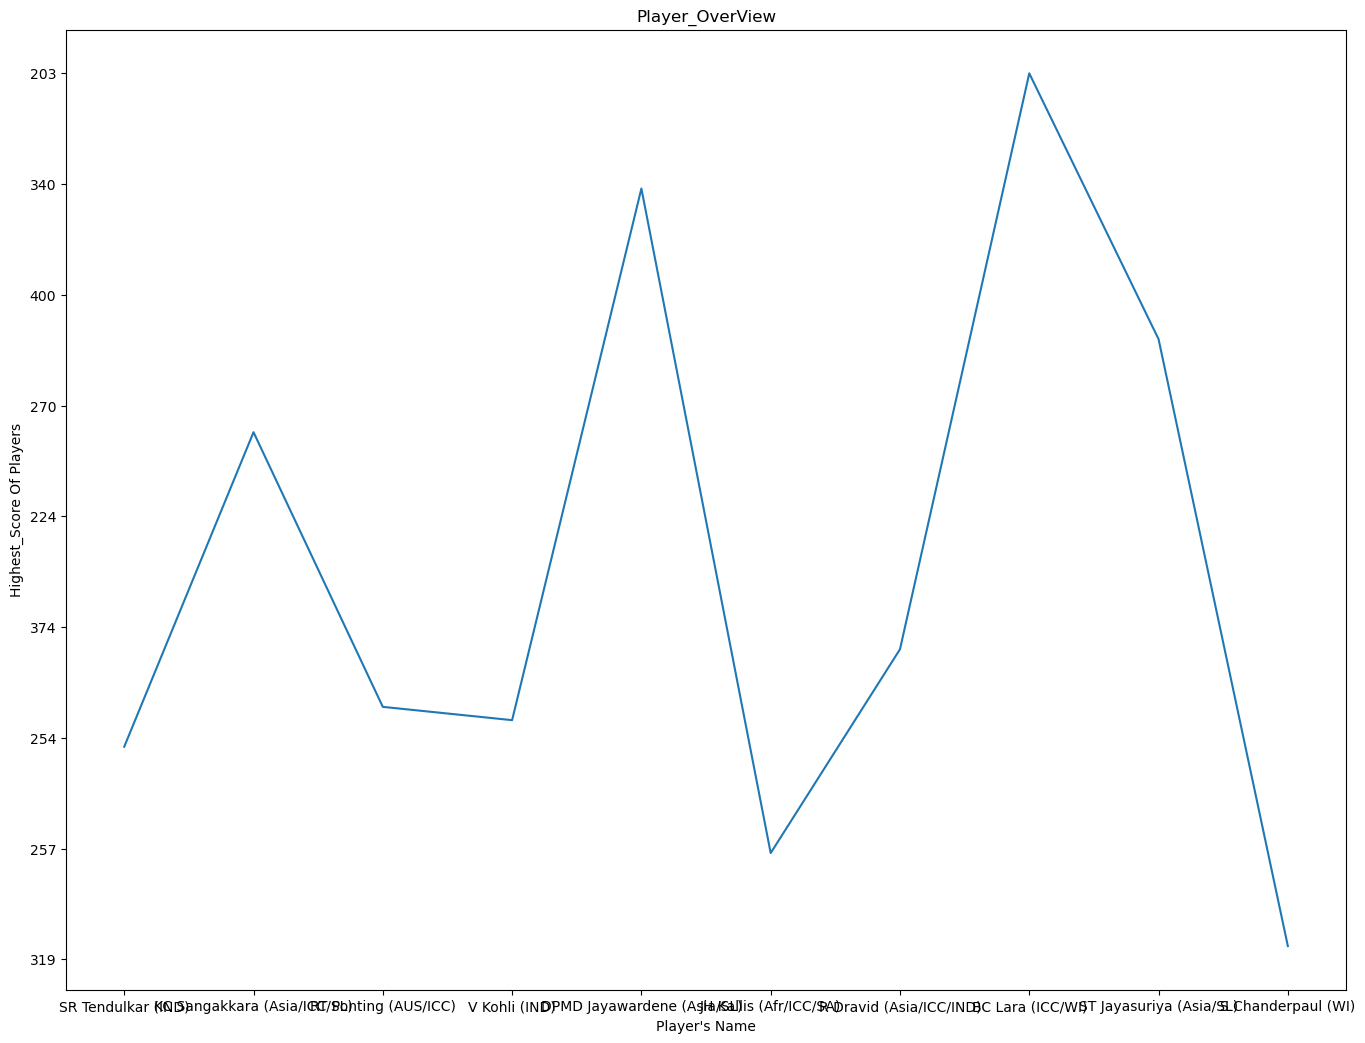

In [58]:
fig=plt.figure()
ax=fig.add_axes([1,2,2,2])

ax.plot(New_Dataframe['Player'].head(10),New_Dataframe['Highest_Score'].head(10))
ax.set_title('Player_OverView')
ax.set_xlabel("Player's Name")
ax.set_ylabel("Highest_Score Of Players")

ax.set_xticklabels(New_Dataframe['Player'].head(10))
ax.set_yticklabels(New_Dataframe['Highest_Score'].head(10))

<BarContainer object of 10 artists>

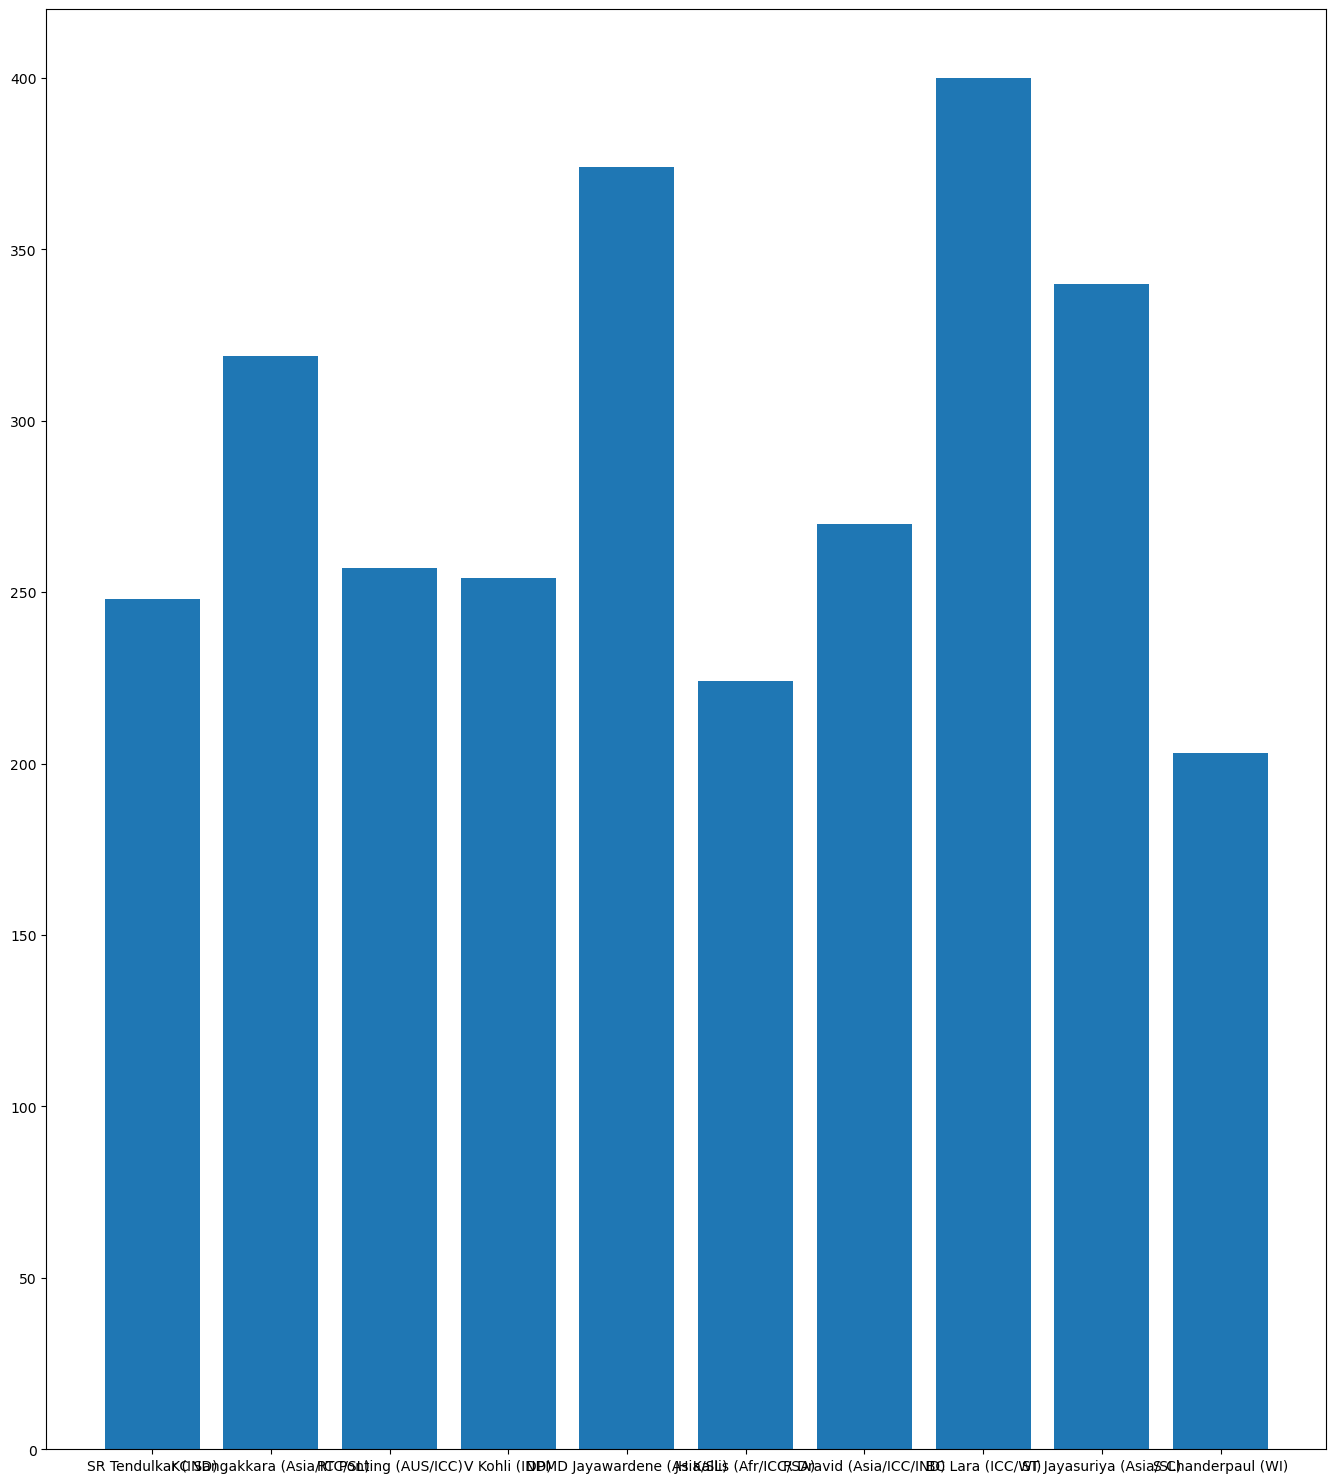

In [71]:
fig=plt.figure()
ax=fig.add_axes([1,3,2,3])
ax.bar(New_Dataframe['Player'].head(10),New_Dataframe['Highest_Score'].head(10))

<BarContainer object of 10 artists>

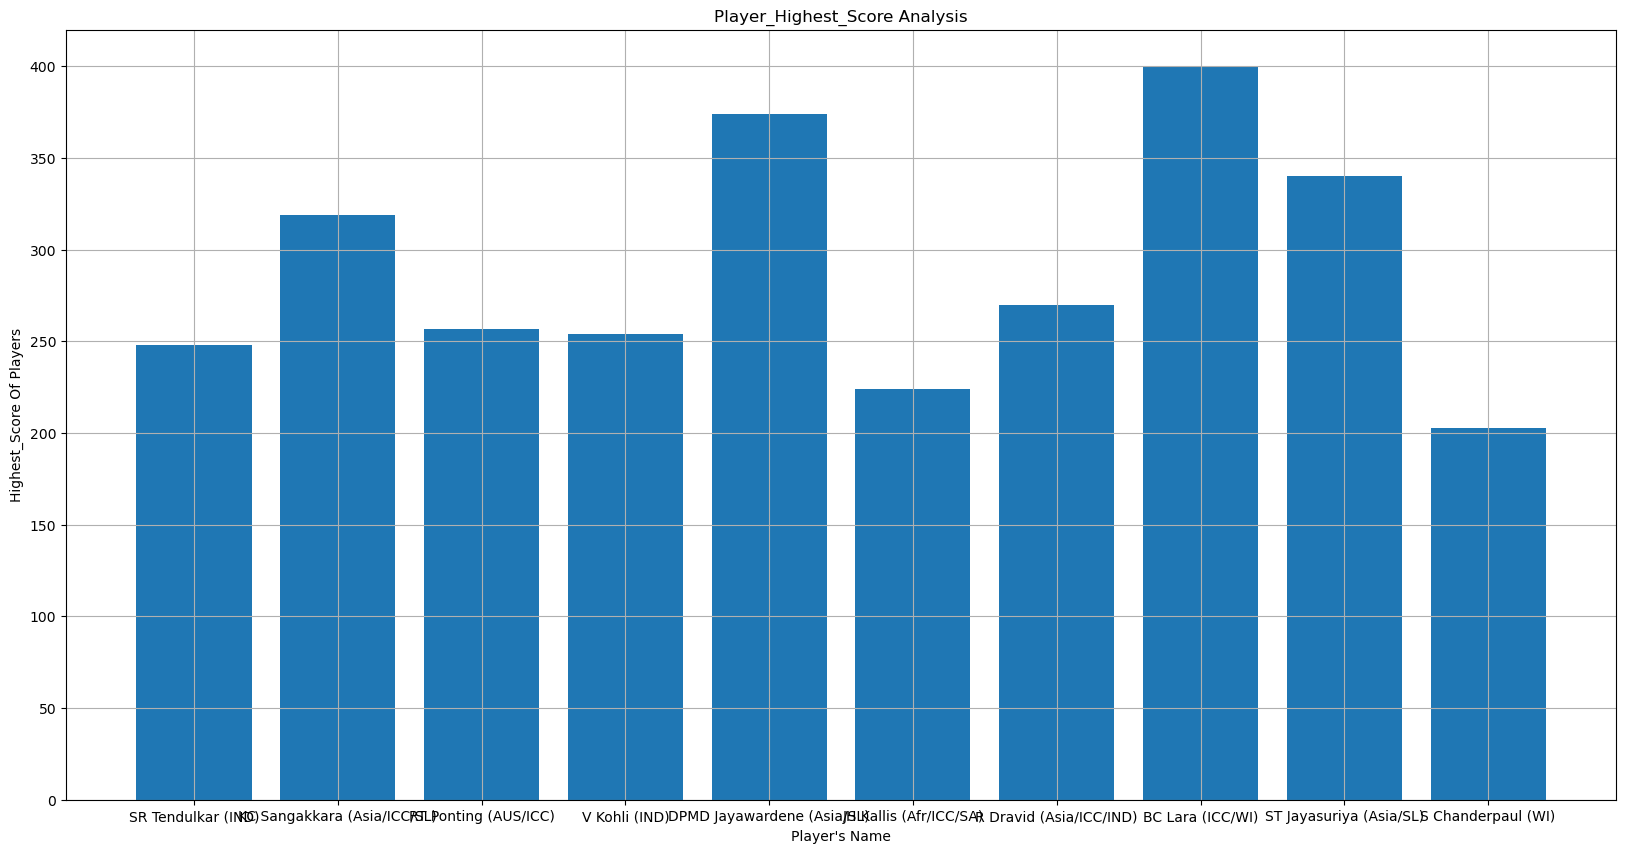

In [74]:
plt.figure(figsize=(20,10))
plt.grid()
plt.title('Player_Highest_Score Analysis')
plt.xlabel("Player's Name")
plt.ylabel("Highest_Score Of Players")
plt.bar(New_Dataframe['Player'].head(10),New_Dataframe['Highest_Score'].head(10))

6.Find the Player who has Scored highest number of 6's

In [75]:
print(Best_Score_in_All_Format[Best_Score_in_All_Format['No_of_6s']==max(Best_Score_in_All_Format['No_of_6s'])]["Player"],
      Best_Score_in_All_Format[Best_Score_in_All_Format['No_of_6s']==max(Best_Score_in_All_Format['No_of_6s'])]["No_of_6s"])

14    RG Sharma (IND)
Name: Player, dtype: object 14    623
Name: No_of_6s, dtype: int64


7. Find all the player whose highest score is more than equal  to 280 

In [81]:
Best_Score_in_All_Format[Best_Score_in_All_Format['Highest_Score']>=310]["Player"]

1       KC Sangakkara (Asia/ICC/SL)
4        DPMD Jayawardene (Asia/SL)
7                  BC Lara (ICC/WI)
8           ST Jayasuriya (Asia/SL)
10    Inzamam-ul-Haq (Asia/ICC/PAK)
13                CH Gayle (ICC/WI)
15                  DA Warner (AUS)
16               HM Amla (SA/World)
21                Younis Khan (PAK)
26          V Sehwag (Asia/ICC/IND)
28                  MJ Clarke (AUS)
42              ML Hayden (AUS/ICC)
54                   GA Gooch (ENG)
79                  MA Taylor (AUS)
Name: Player, dtype: object

8. Find all the players whose highest score more than 300 and the Not_outs more than 70

In [88]:
Best_Score_in_All_Format[(Best_Score_in_All_Format['Highest_Score']>=300) & (Best_Score_in_All_Format['Not_outs']>=70)]#["Player"]

,Player,Playing_Span,Matches,Innings,Not_outs,Runs,Highest_Score,Average,Balls_Faced,Strike_Rate,No_of_100s,No_of_50s,Ducks_out_0,No_of_4s,No_of_6s
10,Inzamam-ul-Haq (Asia/ICC/PAK),1991-2007,499,551,76,20580,329,43.32,32172,63.96,35,129,35,2076,193
28,MJ Clarke (AUS),2003-2015,394,449,71,17112,329,45.26,26033,65.73,36,86,21,1672,102


9. Find all the players whose Inning less than 500 and  Average more than 48

In [94]:
Best_Score_in_All_Format[(Best_Score_in_All_Format['Innings']<=500) & (Best_Score_in_All_Format['Average']>=48)]['Player']

11    AB de Villiers (Afr/SA)
12              JE Root (ENG)
19         KS Williamson (NZ)
39          IVA Richards (WI)
62           MEK Hussey (AUS)
Name: Player, dtype: object

In [23]:
Numeric_DataFrame=Best_Score_in_All_Format[['Matches', 'Innings', 'Not_outs', 'Runs',
       'Highest_Score', 'Average', 'Balls_Faced', 'Strike_Rate', 'No_of_100s',
       'No_of_50s', 'Ducks_out_0', 'No_of_4s', 'No_of_6s']]

<Axes: >

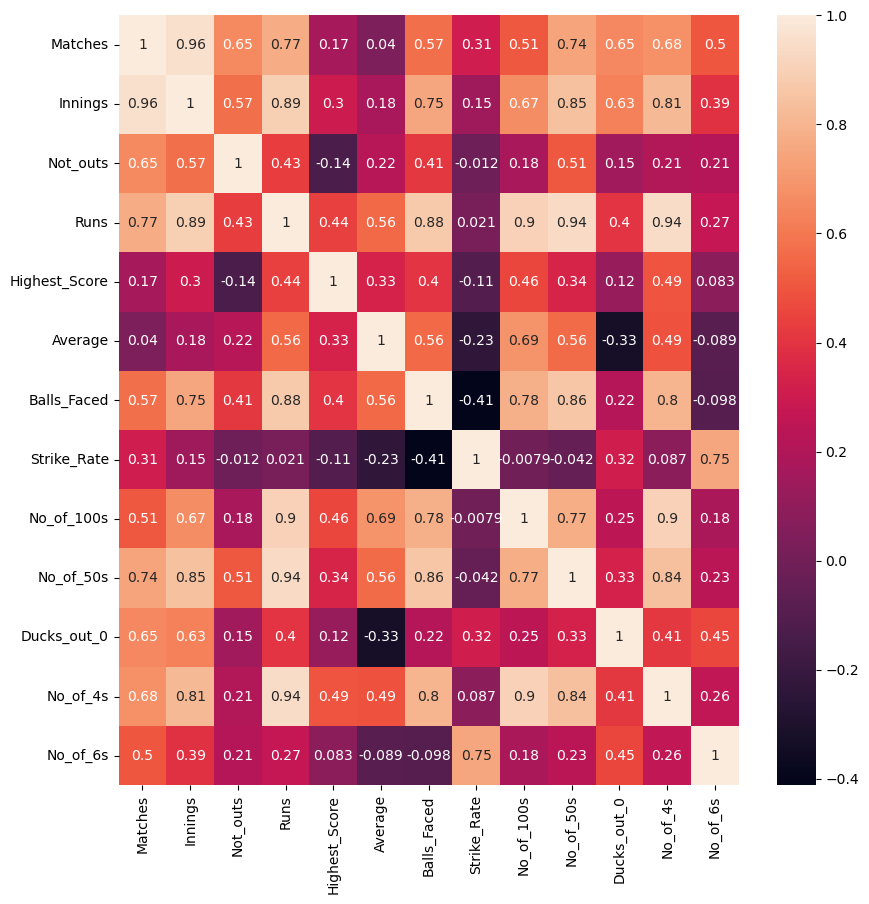

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(Numeric_DataFrame.corr(),annot=True)

In [103]:
Numeric_DataFrame.corr()

,Matches,Innings,Not_outs,Runs,Highest_Score,Average,Balls_Faced,Strike_Rate,No_of_100s,No_of_50s,Ducks_out_0,No_of_4s,No_of_6s
Matches,1.000000,0.957782,0.653917,0.773220,0.168861,0.039924,0.572960,0.310149,0.508261,0.744159,0.652202,0.676001,0.498108
Innings,0.957782,1.000000,0.574003,0.892728,0.298110,0.176419,0.750796,0.145981,0.665952,0.845329,0.628747,0.814465,0.391546
Not_outs,0.653917,0.574003,1.000000,0.431597,-0.136331,0.224200,0.409981,-0.011584,0.175385,0.507794,0.153263,0.207834,0.214604
Runs,0.773220,0.892728,0.431597,1.000000,0.437409,0.558618,0.876980,0.021319,0.904862,0.939188,0.400597,0.943967,0.269848
Highest_Score,0.168861,0.298110,-0.136331,0.437409,1.000000,0.334823,0.400057,-0.107097,0.457449,0.340658,0.121163,0.492794,0.083390
Average,0.039924,0.176419,0.224200,0.558618,0.334823,1.000000,0.555709,-0.233252,0.685679,0.559152,-0.328497,0.489744,-0.088563
Balls_Faced,0.572960,0.750796,0.409981,0.876980,0.400057,0.555709,1.000000,-0.412307,0.781562,0.860974,0.219266,0.801176,-0.097809
Strike_Rate,0.310149,0.145981,-0.011584,0.021319,-0.107097,-0.233252,-0.412307,1.000000,-0.007904,-0.041862,0.315503,0.087141,0.751449
No_of_100s,0.508261,0.665952,0.175385,0.904862,0.457449,0.685679,0.781562,-0.007904,1.000000,0.774517,0.245086,0.900707,0.179323
No_of_50s,0.744159,0.845329,0.507794,0.939188,0.340658,0.559152,0.860974,-0.041862,0.774517,1.000000,0.327496,0.838348,0.234329


# Conclusion